In [644]:
import warnings
warnings.filterwarnings('ignore')

In [645]:
# Load the Drive helper and mount
#from google.colab import drive
#drive.mount('/content/drive')

In [646]:
#dataset_path = '/content/drive/MyDrive/Team Brain/Machine Learning/Assignments/Regression (ML)/Assignment_1(House Price Predictions)/Housing.csv'

In [647]:
import pandas as pd

In [648]:
df = pd.read_csv('Housing.csv')
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Look if there are any NULL values

In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [650]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [651]:
f'Number of features: {df.shape[1]} and samples are {df.shape[0]}'

'Number of features: 13 and samples are 545'

# Look if there are any duplicate values

In [652]:
df.loc[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


# Look for features types. What features can be considered as categorical or numerical?

In [653]:
df.nunique().sort_values()

mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
stories               4
parking               4
bedrooms              6
price               219
area                284
dtype: int64

## EDA

In [654]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'House Price Distribution Plot'}, xlabel='price', ylabel='Density'>

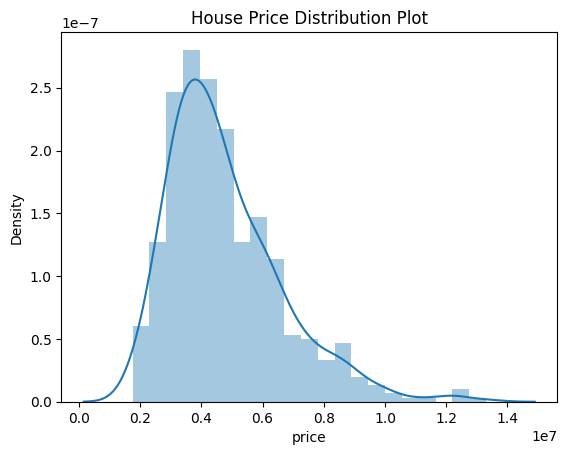

In [655]:
plt.title('House Price Distribution Plot')
sns.distplot(df['price'])

<Axes: title={'center': 'House Price Distribution Plot'}, xlabel='price', ylabel='Density'>

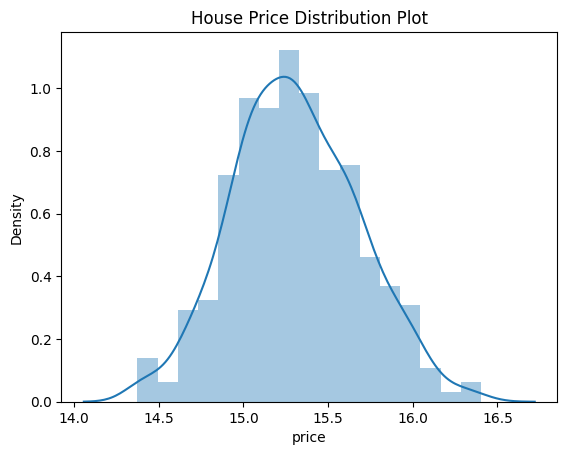

In [656]:
plt.title('House Price Distribution Plot')
# log Transformation -> Converts Non-normal distribution plot to Normal distribution graph
sns.distplot(np.log1p(df['price'])) 

<Axes: title={'center': 'House Price Distribution Plot'}, xlabel='area', ylabel='Density'>

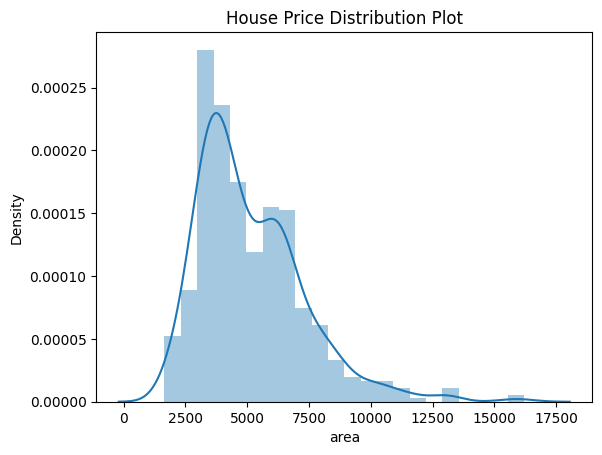

In [657]:
plt.title('House Price Distribution Plot')
sns.distplot(df['area'])

<Axes: title={'center': 'House Price Distribution Plot'}, xlabel='area', ylabel='Density'>

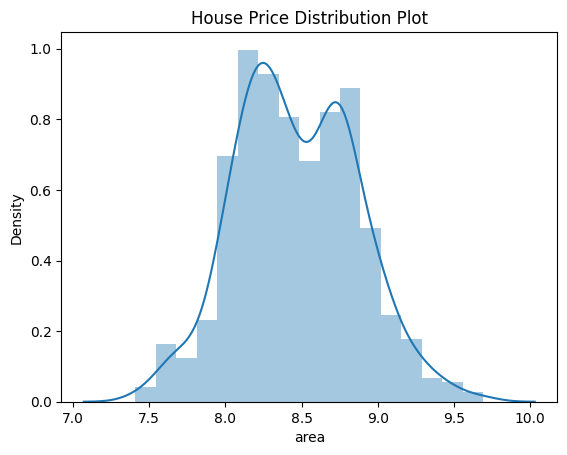

In [658]:
import numpy as np
plt.title('House Price Distribution Plot')
sns.distplot(np.log1p(df['area']))

# Observation: Kind of normally distributed and spread is around 0.4

## All categorical features

In [659]:
categorical_features = [x for x in df.columns.tolist() if x not in ('price', 'area')]
categorical_features

['bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [660]:
numeric_features = [x for x in df.columns.tolist() if x in ('price', 'area')]
numeric_features

['price', 'area']

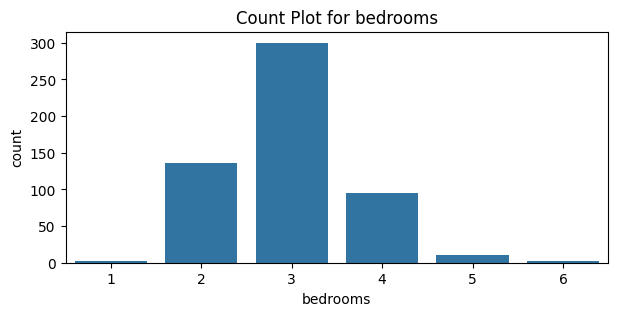

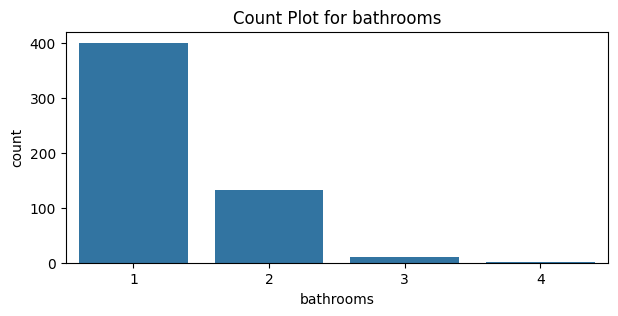

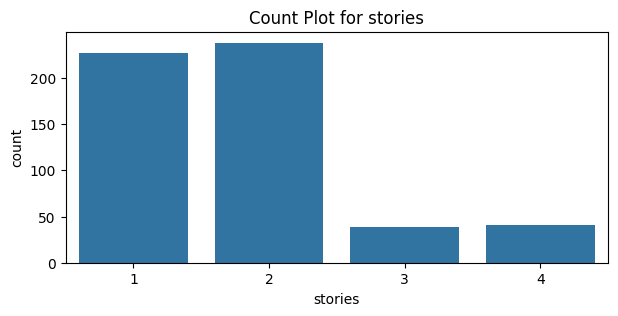

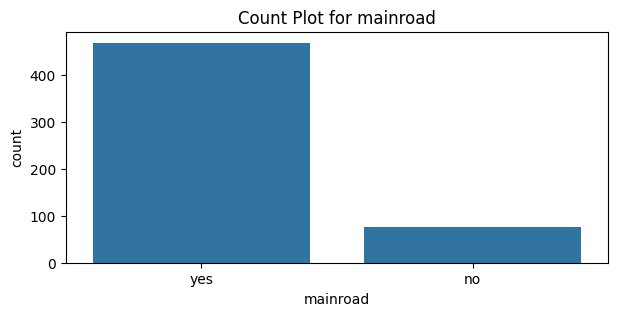

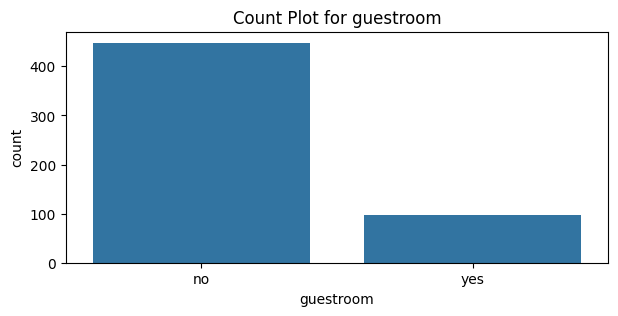

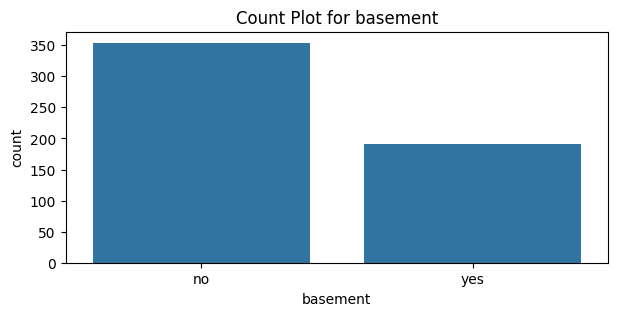

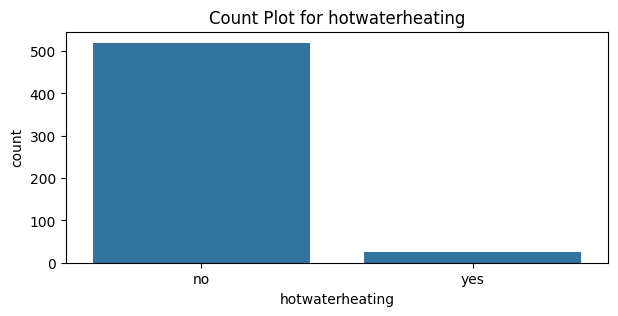

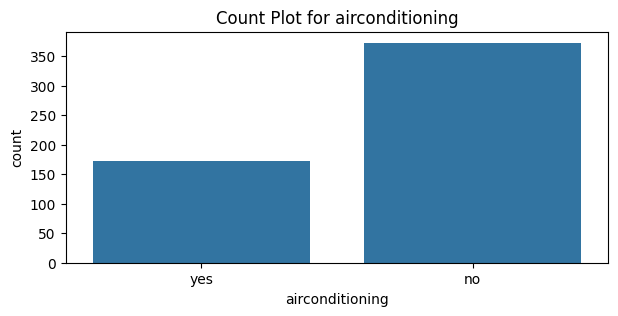

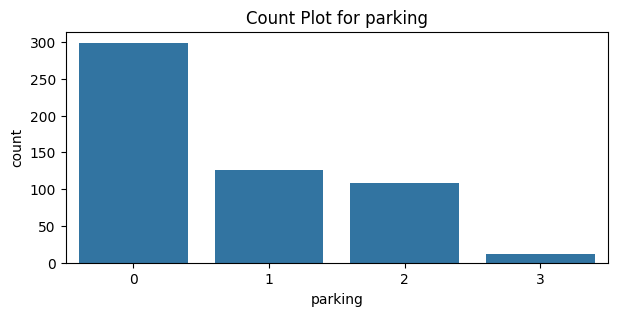

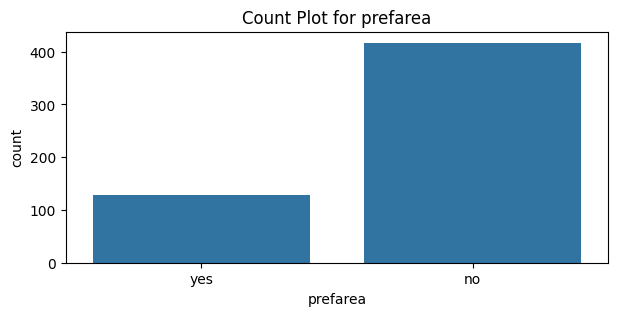

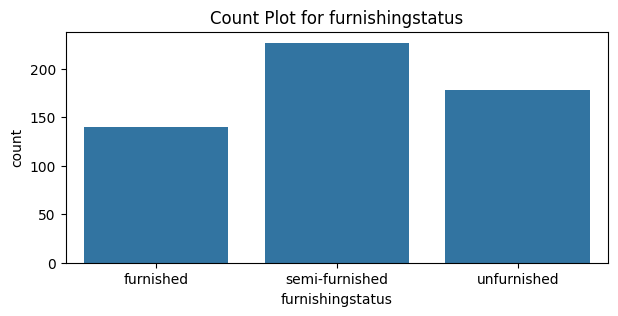

In [661]:
for col in categorical_features:
    print()
    plt.figure(figsize=(7, 3))
    plt.title(f'Count Plot for {col}')
    sns.countplot(data=df, x=col)
    plt.show()

# Visualizing numerical features.

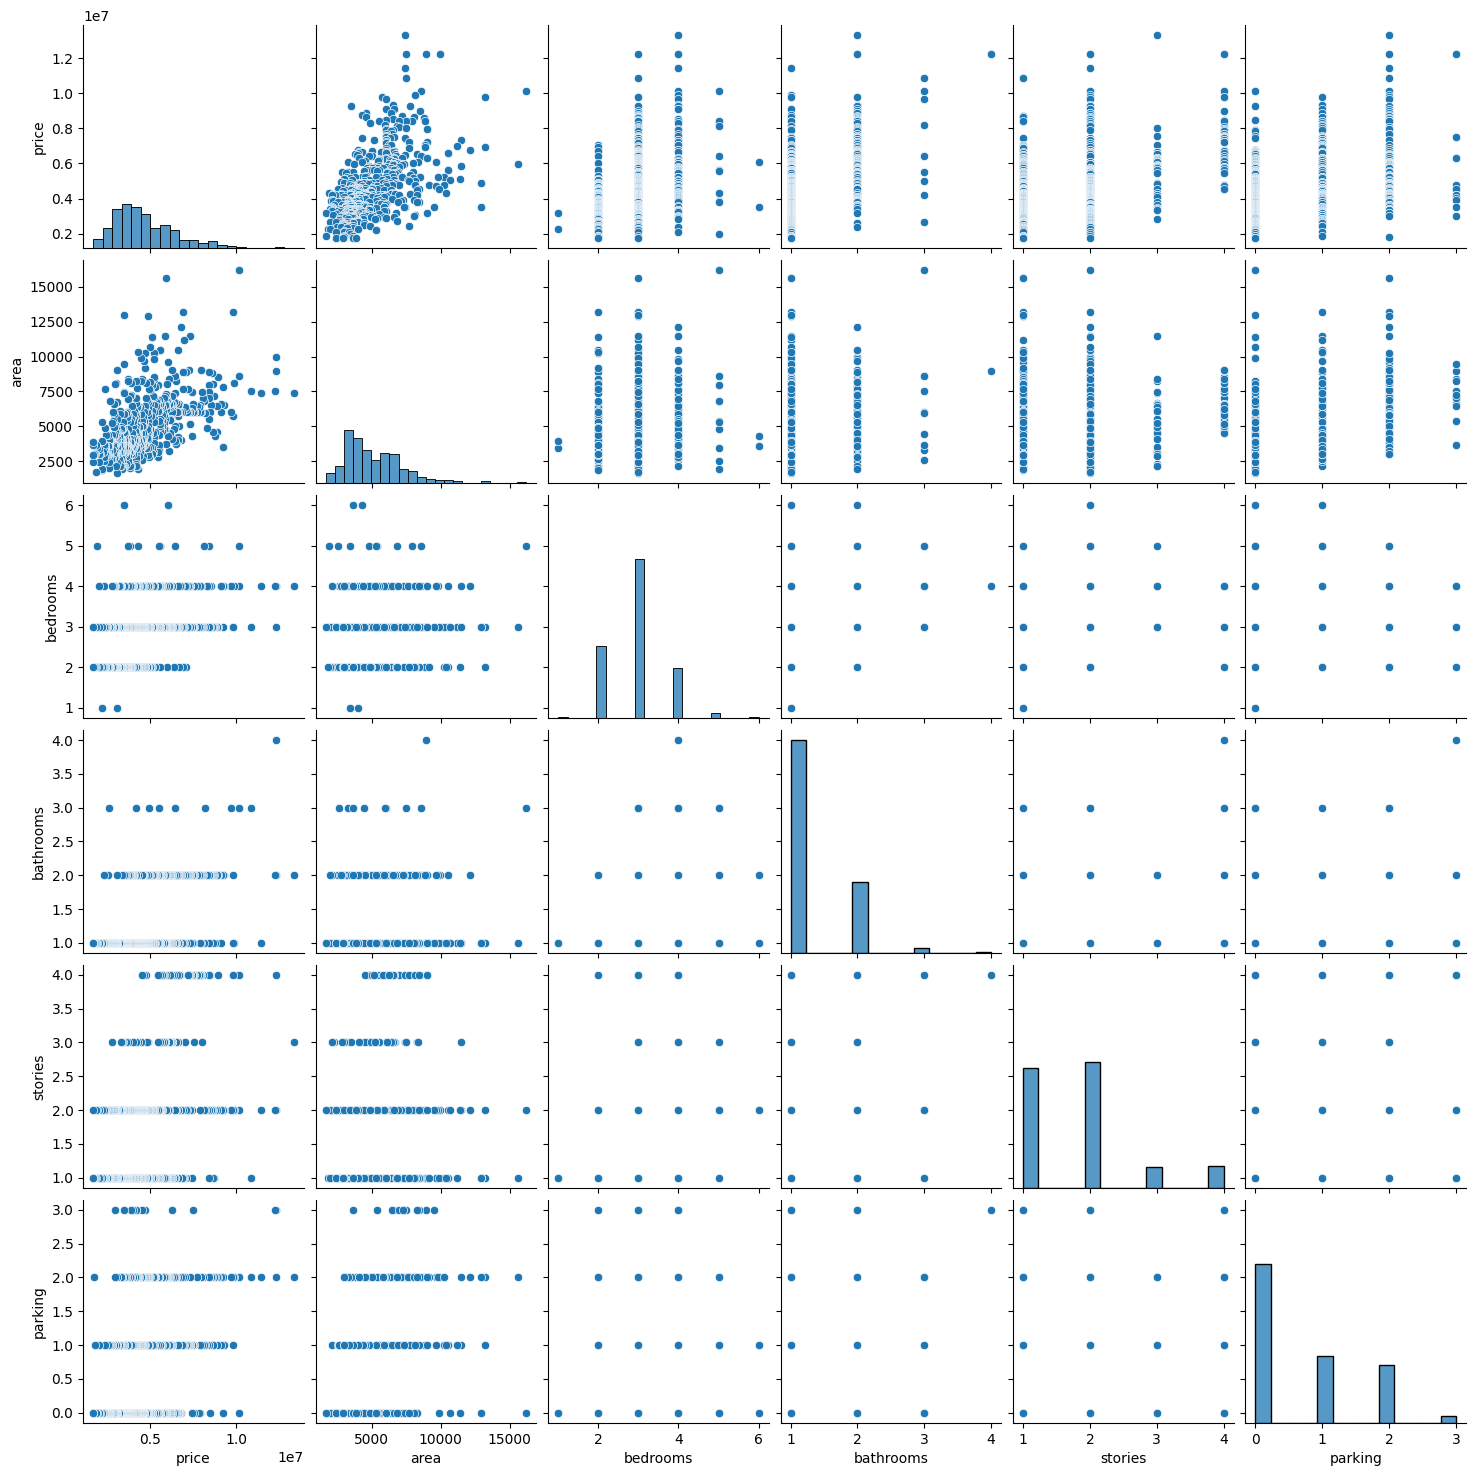

In [662]:
sns.pairplot(df)

# We do see some features have linear relationship.

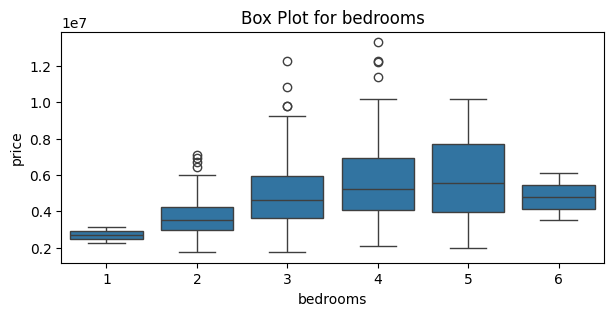

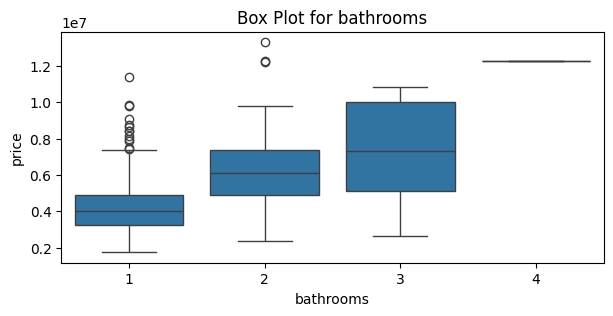

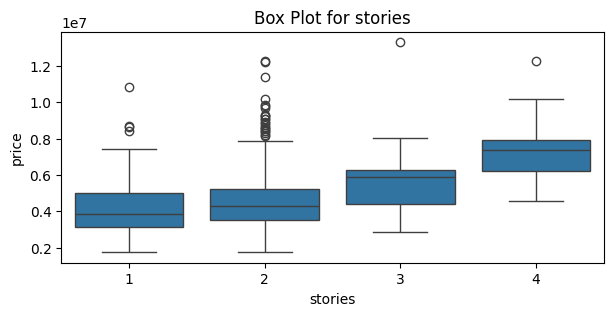

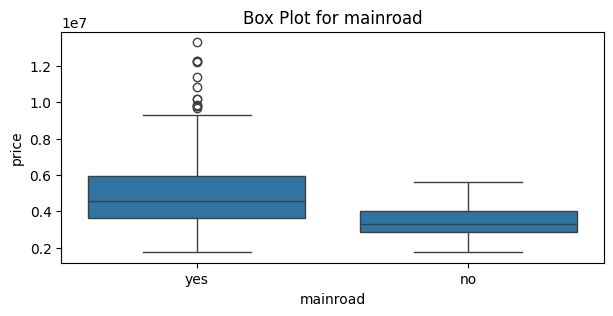

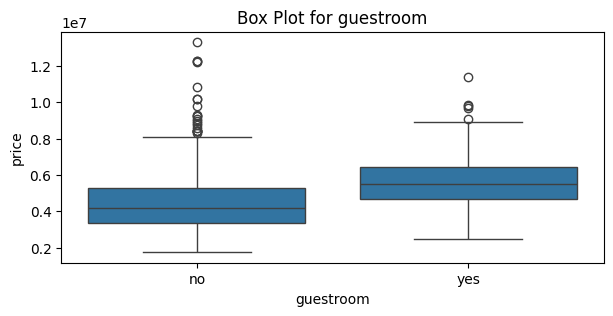

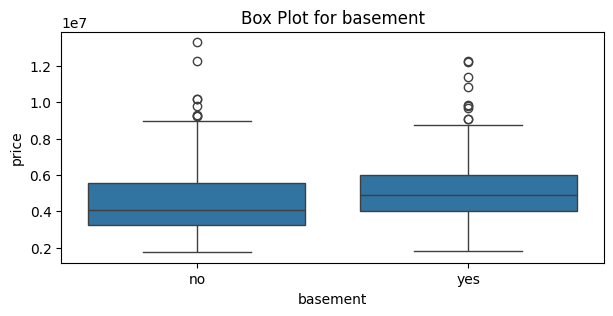

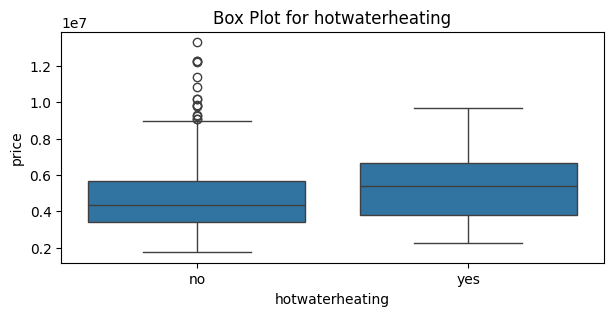

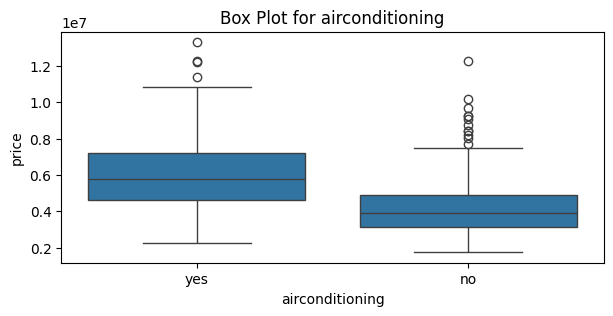

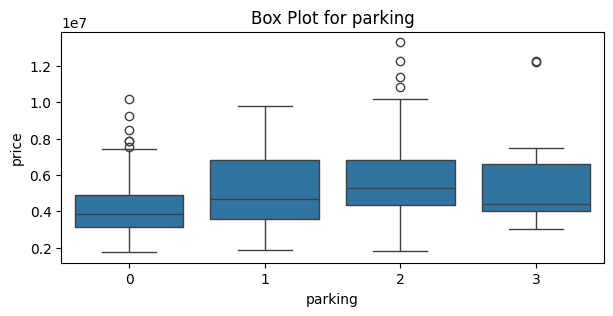

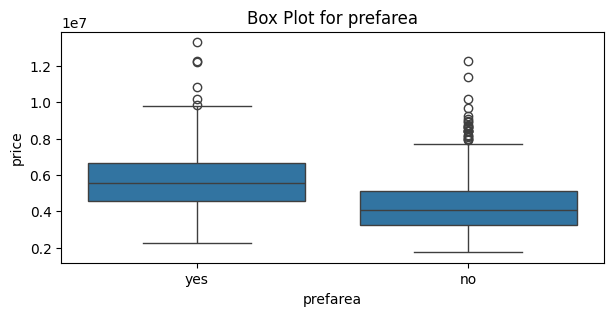

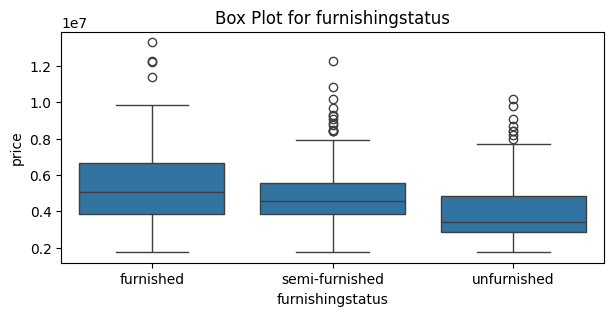

In [663]:
for col in categorical_features:
    print()
    plt.figure(figsize=(7, 3))
    plt.title(f'Box Plot for {col}')
    sns.boxplot(data=df, x=col, y='price')
    plt.show()

# Observations:
*   Median in box plot helps in explaining about the relationship between the price column and categorical column
*   Example: Properties with access to a main road (yes) tend to have a higher median price than those without access (no).
*   There are some outliers in most of the categories, but more noticeable in the "yes / positive" category. These outliers represent houses with much higher prices than the majority/median.



## Group & Aggregration: Provide insight into how the target variable differs across categories

In [664]:
for col in categorical_features:
    print()
    print(df.groupby(col)['price'].mean())


bedrooms
1    2.712500e+06
2    3.632022e+06
3    4.954598e+06
4    5.729758e+06
5    5.819800e+06
6    4.791500e+06
Name: price, dtype: float64

bathrooms
1    4.206913e+06
2    6.209206e+06
3    7.282100e+06
4    1.225000e+07
Name: price, dtype: float64

stories
1    4.170659e+06
2    4.764074e+06
3    5.685436e+06
4    7.208450e+06
Name: price, dtype: float64

mainroad
no     3.398905e+06
yes    4.991777e+06
Name: price, dtype: float64

guestroom
no     4.544546e+06
yes    5.792897e+06
Name: price, dtype: float64

basement
no     4.509966e+06
yes    5.242615e+06
Name: price, dtype: float64

hotwaterheating
no     4.728593e+06
yes    5.559960e+06
Name: price, dtype: float64

airconditioning
no     4.191940e+06
yes    6.013221e+06
Name: price, dtype: float64

parking
0    4.136017e+06
1    5.190389e+06
2    5.896328e+06
3    5.867167e+06
Name: price, dtype: float64

prefarea
no     4.425299e+06
yes    5.879046e+06
Name: price, dtype: float64

furnishingstatus
furnished         5.4956

# Anova(Analysis of Variance) is used when a categorical column has two or more than two unique values.

> The F-statistic in ANOVA (Analysis of Variance) is a test statistic that compares the variance between group means to the variance within the groups. It's a measure of how much the group means differ relative to the variation within the groups.

### Interpreting the F-Statistic:
- High F-Statistic: A high F-statistic indicates that the group means are more spread out than what would be expected by random chance. This suggests that there is a significant difference between groups.
- Low F-Statistic: A low F-statistic suggests that the group means are not much different from each other relative to the variation within the groups, implying no significant difference.

### Interpretation:
- If p-value < 0.05: Significant difference between groups(in same column).
- If p-value >= 0.05: No significant difference between groups(in same column).
- A high F-statistic with a low p-value implies that the groups are likely different from each other.

> A high F-statistic with a low p-value implies that the groups are likely different from each other.

In [665]:
# from scipy.stats import f_oneway, ttest_ind

# for col in categorical_features:
#     groups = [df[df[col] == category]['price'] for category in df[col].unique()]

#     # Perform ANOVA
#     anova_result = f_oneway(*groups)
#     print(f"\nANOVA Test Result for {col}:")
#     print(f"F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4f}")



# Correlation Matrix

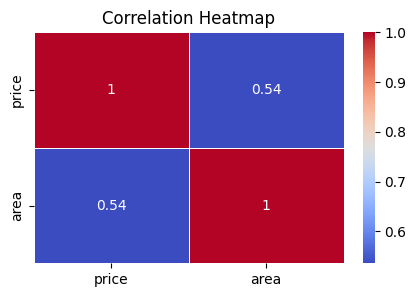

In [666]:
cor_matrix= df[numeric_features].corr()
plt.figure(figsize=(5, 3))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Observation: 
> Correlation matrix generally is used to remove highly correlated variables. In our case, price is the target variable. So here, we are just checking the relationship between independent and dependent variables.

> One-hot encoding for the categorical variables

In [667]:
categorical_features

['bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [668]:
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True).astype(int)
df_encoded.head()

,price,area,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_2,bathrooms_3,bathrooms_4,...,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
1,12250000,8960,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,12250000,9960,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
3,12215000,7500,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,1,1,0,0
4,11410000,7420,0,0,1,0,0,0,0,0,...,1,1,0,1,0,1,0,0,0,0


# Using `drop_first=True` reduces the number of dummy variables created by removing one from each set, which can be useful to avoid multicollinearity in models.

# Normalization `area` column

In [669]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded['area'] = scaler.fit_transform(df_encoded[['area']])
df_encoded.head(10)


,price,area,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_2,bathrooms_3,bathrooms_4,...,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,0.396564,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
1,12250000,0.502405,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,12250000,0.571134,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
3,12215000,0.402062,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,1,1,0,0
4,11410000,0.396564,0,0,1,0,0,0,0,0,...,1,1,0,1,0,1,0,0,0,0
5,10850000,0.402062,0,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,1,0
6,10150000,0.476289,0,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,1,1,0
7,10150000,1.000000,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,9870000,0.443299,0,0,1,0,0,0,0,0,...,1,1,0,1,0,1,0,1,0,0
9,9800000,0.281787,0,1,0,0,0,1,0,0,...,1,0,0,1,1,0,0,1,0,1


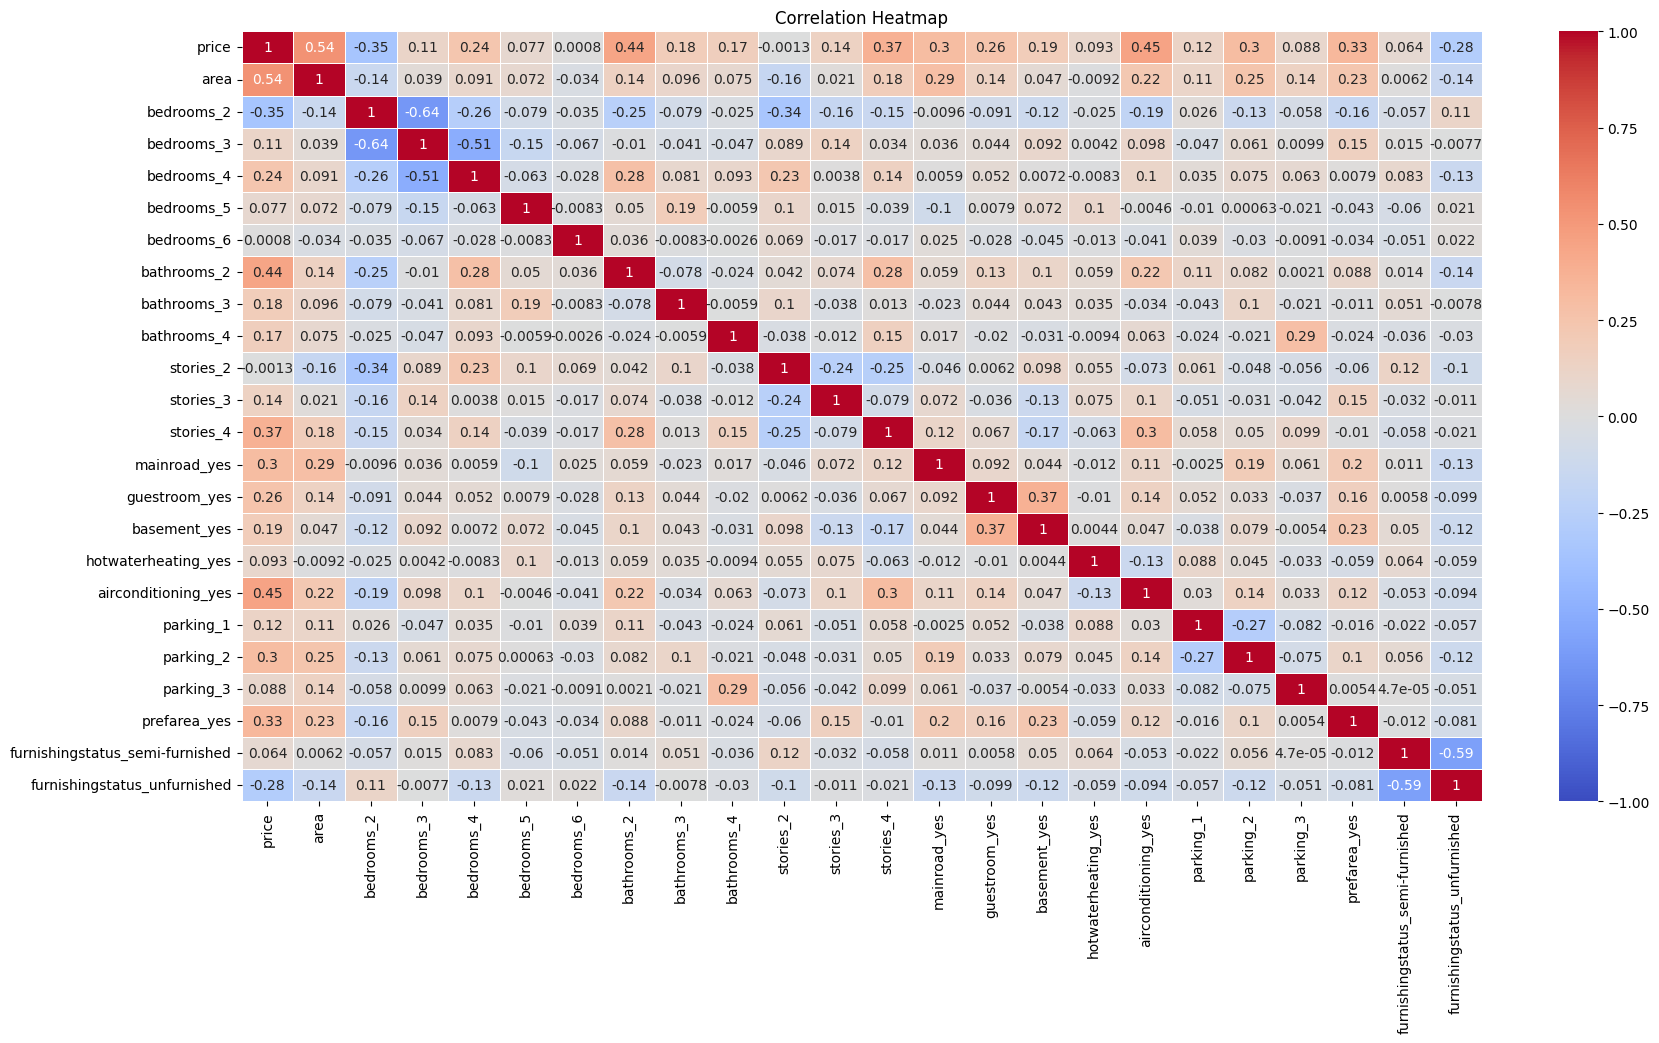

In [670]:
 cor_matrix= df_encoded.corr()
 plt.figure(figsize=(20, 10))
 sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1 )
 plt.title('Correlation Heatmap')
 plt.show()

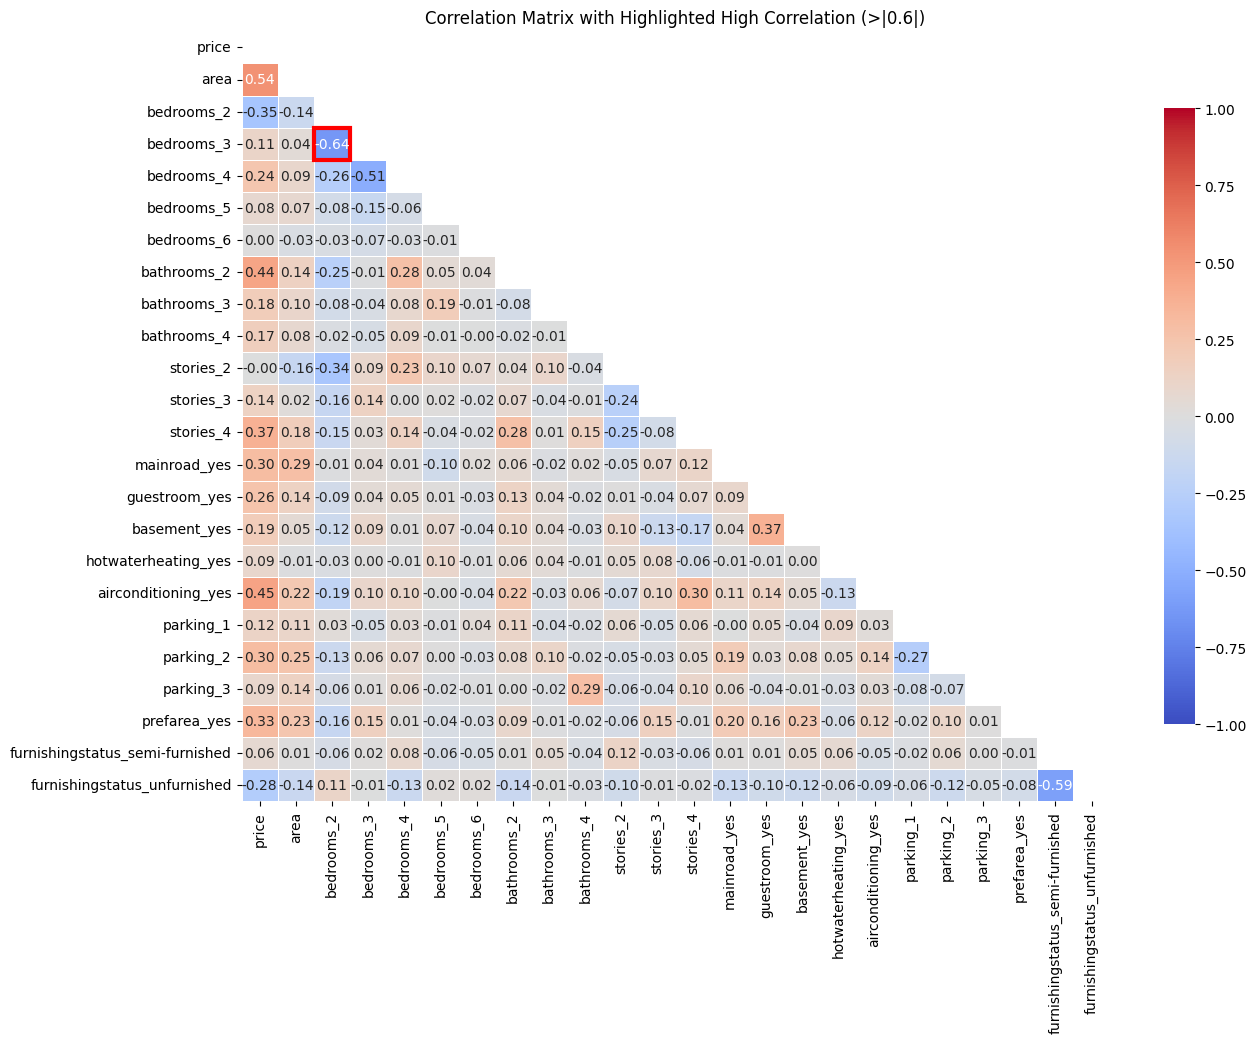

In [671]:
import numpy as np

corr_matrix = df_encoded.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    center=0,
    vmin=-1,
    vmax=1
)

# Highlight cells where correlation is greater than 0.9
highlight_threshold = 0.6 # 0.9
avoid_target_column = 'price'

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        value = corr_matrix.iloc[i, j]
        if abs(value) > highlight_threshold and corr_matrix.columns[j] != avoid_target_column:  # Avoid self-correlation
            plt.gca().add_patch(
                plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', lw=3)
            )

plt.title(f"Correlation Matrix with Highlighted High Correlation (>|{highlight_threshold}|)")
plt.show()

In [672]:
X = df_encoded.drop(['price'], axis=1)
y = df_encoded['price']
y = np.log1p(y)
X.shape, y.shape

((545, 23), (545,))

In [673]:
y, df_encoded['price']

(0      16.403275
 1      16.321037
 2      16.321037
 3      16.318175
 4      16.250001
          ...    
 540    14.414348
 541    14.384879
 542    14.375127
 543    14.375127
 544    14.375127
 Name: price, Length: 545, dtype: float64,
 0      13300000
 1      12250000
 2      12250000
 3      12215000
 4      11410000
          ...   
 540     1820000
 541     1767150
 542     1750000
 543     1750000
 544     1750000
 Name: price, Length: 545, dtype: int32)

### Feature Selection & Feature Engineering

In [674]:
def remove_highly_correlated_features(X, threshold=0.9):
    cor_matrix = X.corr()

    upper = cor_matrix.where(abs(cor_matrix) > threshold)

    features_to_drop = []

    for column in upper.columns:
        correlated_features = upper[column].dropna().index.tolist()
        for feature in correlated_features:
            if column != feature and column not in features_to_drop:
                features_to_drop.append(column)

    X_tmp = X.drop(columns=features_to_drop)
    return X_tmp.columns.tolist()

In [675]:
def r2_adj_score(model, x,y):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    return 1-(1-r2)*(n-1)/(n-p-1)

In [676]:
# def recursive_feature_elimination(X, y, model, num_features):
#     from sklearn.feature_selection import RFE
#     from sklearn.linear_model import LinearRegression

#     # Example: Use RFE with a linear model to select top features
#     model = LinearRegression()
#     rfe = RFE(model, n_features_to_select=15)
#     fit = rfe.fit(X, y)

#     # Get selected features
#     selected_features = X.columns[fit.support_]
#     print("Selected Features:", selected_features)

In [677]:
def anova_feature_selection(X, y):
    from sklearn.feature_selection import SelectKBest, f_regression
    f_statistic, p_values = f_regression(X, y)

    selected_features = []
    for i in range(len(p_values)):
        if p_values[i] < 0.05:
            selected_features.append(X.columns[i])
    return selected_features

- F-statistic helps identify how well a feature explains the variance in the target variable.
- P-value helps assess whether the relationship is statistically significant or likely due to random chance.

## When to use this information:

- Feature selection: You can use F-statistics and p-values to select the most important features. Features with higher F-statistics and lower p-values are often selected as they explain more variance in the target.
- Hypothesis testing: P-values allow you to test the null hypothesis (no relationship between the feature and target). If the p-value is low, you reject the null hypothesis.

 > VIF helps you identify if there is multicollinearity in your model, which can distort the results and make it harder to interpret the individual impact of each feature. High VIF values indicate that some features are closely related to others, and you may need to adjust your model accordingly.

In [678]:
def vif_feature_selection(X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    import copy

    X_tmp = copy.deepcopy(X)

    def calculate_vif(X_tmp):
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X_tmp.columns
        vif_data["VIF"] = [variance_inflation_factor(X_tmp.values, i) for i in range(X_tmp.shape[1])]
        return vif_data

    vif_data = calculate_vif(X_tmp)

    threshold = 5

    # Loop to drop features with high VIF
    while vif_data["VIF"].max() > threshold:
        feature_to_drop = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
        print(f"Dropping feature: {feature_to_drop} with VIF: {vif_data['VIF'].max()}")

        X_tmp = X_tmp.drop(columns=[feature_to_drop])
        vif_data = calculate_vif(X_tmp)

    print("Final VIF values:")
    print(vif_data)
    return vif_data['Feature'].tolist()

In [679]:
f'Total Features: {X.shape[1]}'

'Total Features: 23'

In [680]:
def build_model_and_evaluate(X, y):
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score, mean_squared_error
    import math

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    # y = np.expm1(y)
    # y_pred = np.expm1(y_pred) # Inverse Transformation
    r2_acc = r2_score(y, y_pred)
    r2_adj_acc = r2_adj_score(model, X, y)
    # r2_adj_acc = None
    rmse = math.sqrt(mean_squared_error(y, y_pred))
    print('R2 Square: ', r2_acc)
    print('Adjusted R2 Square: ', r2_adj_acc)
    print('RMSE: ', rmse)
    return r2_acc, r2_adj_acc, rmse

In [681]:
build_model_and_evaluate(X, y)

R2 Square:  0.7075009048265599
Adjusted R2 Square:  0.6945882768246614
RMSE:  0.20109398957660643


(0.7075009048265599, 0.6945882768246614, 0.20109398957660643)

In [682]:
def one_feature_selection(X, y):
    r2_score_threshold = 0.1
    selected_features = []
    for col in X.columns.tolist():
        print(f'\n {col}')
        r2_acc, r2_adj_acc, rmse = build_model_and_evaluate(X[[col]], y)
        if r2_acc >= r2_score_threshold:
            selected_features.append(col)
    return selected_features

In [683]:
selected_features = remove_highly_correlated_features(X)
print(f'Selected Features after removing highly correlated_features: {len(selected_features)}')
build_model_and_evaluate(X[selected_features], y)

Selected Features after removing highly correlated_features: 23
R2 Square:  0.7075009048265599
Adjusted R2 Square:  0.6945882768246614
RMSE:  0.20109398957660643


(0.7075009048265599, 0.6945882768246614, 0.20109398957660643)

In [684]:
selected_features = vif_feature_selection(X)
print(f'Selected Features after removing correlated_features using VIF: {len(selected_features)}')
build_model_and_evaluate(X[selected_features], y)

Dropping feature: bedrooms_3 with VIF: 10.429616788721685
Dropping feature: mainroad_yes with VIF: 6.691880865655414
Final VIF values:
                            Feature       VIF
0                              area  3.832945
1                        bedrooms_2  1.504810
2                        bedrooms_4  1.504719
3                        bedrooms_5  1.122107
4                        bedrooms_6  1.022323
5                       bathrooms_2  1.730356
6                       bathrooms_3  1.118120
7                       bathrooms_4  1.128699
8                         stories_2  2.200261
9                         stories_3  1.290870
10                        stories_4  1.567263
11                    guestroom_yes  1.489998
12                     basement_yes  1.971858
13              hotwaterheating_yes  1.126110
14              airconditioning_yes  1.799284
15                        parking_1  1.550683
16                        parking_2  1.571558
17                        parking_3  

(0.6967669974014783, 0.6845912936642528, 0.20475054196894188)

In [685]:
selected_features = anova_feature_selection(X, y)
print(f'Selected Features after removing correlated_features using ANOVA: {len(selected_features)}')
build_model_and_evaluate(X[selected_features], y)

Selected Features after removing correlated_features using ANOVA: 19
R2 Square:  0.7034507475905409
Adjusted R2 Square:  0.6927184889319129
RMSE:  0.20248145065294776


(0.7034507475905409, 0.6927184889319129, 0.20248145065294776)

In [686]:
selected_features = one_feature_selection(X, y)
print(f'\n\nSelected Features after removing correlated_features using one_feature: {len(selected_features)}')
build_model_and_evaluate(X[selected_features], y)


 area
R2 Square:  0.29510169390706986
Adjusted R2 Square:  0.2938035386472302
RMSE:  0.3121763944389967

 bedrooms_2
R2 Square:  0.1364751799344721
Adjusted R2 Square:  0.13488489481464605
RMSE:  0.3455208339796115

 bedrooms_3
R2 Square:  0.020524922400366186
Adjusted R2 Square:  0.01872110089465795
RMSE:  0.36798788576317343

 bedrooms_4
R2 Square:  0.04975792194870032
Adjusted R2 Square:  0.048007936537924456
RMSE:  0.3624548836105151

 bedrooms_5
R2 Square:  0.004111299871913721
Adjusted R2 Square:  0.002277250700407074
RMSE:  0.37105836719779367

 bedrooms_6
R2 Square:  3.7773051491885035e-05
Adjusted R2 Square:  -0.0018037780110284896
RMSE:  0.3718164708435586

 bathrooms_2
R2 Square:  0.1929762695255547
Adjusted R2 Square:  0.19149003797771968
RMSE:  0.3340257743764222

 bathrooms_3
R2 Square:  0.022362247857955042
Adjusted R2 Square:  0.020561810008706383
RMSE:  0.36764258301288694

 bathrooms_4
R2 Square:  0.013672430332570151
Adjusted R2 Square:  0.011855989136129175
RMSE:  

(0.6343170728244161, 0.628859118687467, 0.22484807262287196)

In [687]:
y

0      16.403275
1      16.321037
2      16.321037
3      16.318175
4      16.250001
         ...    
540    14.414348
541    14.384879
542    14.375127
543    14.375127
544    14.375127
Name: price, Length: 545, dtype: float64

In [688]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import math

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
#y = np.expm1(y)
#y_pred = np.expm1(y_pred) # Inverse Transformation
r2_acc = r2_score(y, y_pred)
r2_adj_acc = r2_adj_score(model, X, y)
# r2_adj_acc = None
rmse = math.sqrt(mean_squared_error(y, y_pred))
print('R2 Square: ', r2_acc)
print('Adjusted R2 Square: ', r2_adj_acc)
print('RMSE: ', rmse)

R2 Square:  0.7075009048265599
Adjusted R2 Square:  0.6945882768246614
RMSE:  0.20109398957660643


In [689]:
"""
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import math

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
y = np.expm1(y)
y_pred = np.expm1(y_pred) # Inverse Transformation
r2_acc = r2_score(y, y_pred)
r2_adj_acc = r2_adj_score(model, X, y)
# r2_adj_acc = None
rmse = math.sqrt(mean_squared_error(y, y_pred))
print('R2 Square: ', r2_acc)
print('Adjusted R2 Square: ', r2_adj_acc)
print('RMSE: ', rmse)
"""

"\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import r2_score, mean_squared_error\nimport math\n\nmodel = LinearRegression()\nmodel.fit(X, y)\ny_pred = model.predict(X)\ny = np.expm1(y)\ny_pred = np.expm1(y_pred) # Inverse Transformation\nr2_acc = r2_score(y, y_pred)\nr2_adj_acc = r2_adj_score(model, X, y)\n# r2_adj_acc = None\nrmse = math.sqrt(mean_squared_error(y, y_pred))\nprint('R2 Square: ', r2_acc)\nprint('Adjusted R2 Square: ', r2_adj_acc)\nprint('RMSE: ', rmse)\n"

In [690]:

from sklearn.model_selection import train_test_split
train_test_split_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_test_split_ratio, random_state=42)

In [691]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
r2_acc = r2_score(y_train, y_pred)
rmse = math.sqrt(mean_squared_error(y_train, y_pred))
r2_acc, rmse

(0.7119634364422058, 0.18926896912271307)

In [692]:
model = LinearRegression()
model.fit(X_test, y_test)
y_pred = model.predict(X_test)
r2_acc = r2_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2_acc, rmse

(0.7577909968654568, 0.2162586582328832)

In [693]:
[float(x) for x in np.expm1(y_pred)]

[4263601.422590492,
 8090894.701290546,
 2840170.5123885684,
 5306137.946434105,
 3168439.2814805033,
 3534649.5566720148,
 6501216.337350737,
 5142885.213633227,
 2668093.2193685267,
 2506441.5624919175,
 11772182.781949056,
 2354583.884396589,
 2668093.2193685267,
 3534649.5566720148,
 3646851.4096593847,
 3534649.5566720148,
 2752787.6214199425,
 5474572.877257622,
 4831293.48965039,
 3218334.955707575,
 6203503.920214531,
 7252631.033126088,
 2354583.884396589,
 5142885.213633227,
 4756391.211184672,
 8612712.641706115,
 2840170.5123885684,
 4468215.975051153,
 11589671.989101699,
 2710109.589616963,
 6301194.907914141,
 3646851.4096593847,
 8347727.30056935,
 4610052.40728461,
 3320495.9054186144,
 6301194.907914141,
 6012642.138909445,
 4263601.422590492,
 3218334.955707575,
 3320495.9054186144,
 5306137.946434105,
 3023345.837313988,
 8090894.701290546,
 4197500.3938479675,
 3372786.123048139,
 4005282.81042469,
 7841964.010372585,
 4468215.975051153,
 3119317.1679819687,
 30233

In [694]:
# Original Values 
y = np.expm1(y)
y_pred = np.expm1(y_pred)
y_pred = [float(x) for x in y_pred]
y_pred

[4263601.422590492,
 8090894.701290546,
 2840170.5123885684,
 5306137.946434105,
 3168439.2814805033,
 3534649.5566720148,
 6501216.337350737,
 5142885.213633227,
 2668093.2193685267,
 2506441.5624919175,
 11772182.781949056,
 2354583.884396589,
 2668093.2193685267,
 3534649.5566720148,
 3646851.4096593847,
 3534649.5566720148,
 2752787.6214199425,
 5474572.877257622,
 4831293.48965039,
 3218334.955707575,
 6203503.920214531,
 7252631.033126088,
 2354583.884396589,
 5142885.213633227,
 4756391.211184672,
 8612712.641706115,
 2840170.5123885684,
 4468215.975051153,
 11589671.989101699,
 2710109.589616963,
 6301194.907914141,
 3646851.4096593847,
 8347727.30056935,
 4610052.40728461,
 3320495.9054186144,
 6301194.907914141,
 6012642.138909445,
 4263601.422590492,
 3218334.955707575,
 3320495.9054186144,
 5306137.946434105,
 3023345.837313988,
 8090894.701290546,
 4197500.3938479675,
 3372786.123048139,
 4005282.81042469,
 7841964.010372585,
 4468215.975051153,
 3119317.1679819687,
 30233

In [699]:
df_compare = pd.DataFrame({'Actual':y, 'Predicted':y_pred})
df_compare['Predicted'] = df_compare['Predicted'].astype(float)
df_compare

ValueError: array length 109 does not match index length 545

In [697]:
df_compare.sort_values(['Predicted'], ascending=False)

,Actual,Predicted,error_diff
1,12250000.0,1.225000e+07,4.470348e-08
6,10150000.0,1.151660e+07,1.366601e+06
57,7245000.0,1.028040e+07,3.035399e+06
26,8463000.0,9.187803e+06,7.248027e+05
5,10850000.0,9.146567e+06,-1.703433e+06
...,...,...,...
521,2408000.0,2.470369e+06,6.236893e+04
528,2275000.0,2.416309e+06,1.413090e+05
484,2870000.0,2.400956e+06,-4.690440e+05
532,2135000.0,2.396360e+06,2.613602e+05


In [698]:
df_compare['error_diff'] = df_compare['Predicted'] - df_compare['Actual']
df_compare

,Actual,Predicted,error_diff
0,13300000.0,8.403936e+06,-4.896064e+06
1,12250000.0,1.225000e+07,4.470348e-08
2,12250000.0,7.868515e+06,-4.381485e+06
3,12215000.0,7.230752e+06,-4.984248e+06
4,11410000.0,6.502035e+06,-4.907965e+06
...,...,...,...
540,1820000.0,3.289854e+06,1.469854e+06
541,1767150.0,2.863491e+06,1.096341e+06
542,1750000.0,2.779427e+06,1.029427e+06
543,1750000.0,2.871942e+06,1.121942e+06


In [700]:
df_compare['error_diff'] = df_compare['Predicted'] - df_compare['Actual']
df_compare.sort_values(['error_diff'], ascending=False)

,Actual,Predicted,error_diff
220,4795000.0,8.003202e+06,3.208202e+06
57,7245000.0,1.028040e+07,3.035399e+06
229,4690000.0,7.193969e+06,2.503969e+06
378,3640000.0,5.938517e+06,2.298517e+06
415,3395000.0,5.554215e+06,2.159215e+06
...,...,...,...
15,9100000.0,4.924287e+06,-4.175713e+06
2,12250000.0,7.868515e+06,-4.381485e+06
0,13300000.0,8.403936e+06,-4.896064e+06
4,11410000.0,6.502035e+06,-4.907965e+06


In [701]:
df_encoded.loc[220]

price                              4.795000e+06
area                               4.432990e-01
bedrooms_2                         0.000000e+00
bedrooms_3                         0.000000e+00
bedrooms_4                         1.000000e+00
bedrooms_5                         0.000000e+00
bedrooms_6                         0.000000e+00
bathrooms_2                        0.000000e+00
bathrooms_3                        0.000000e+00
bathrooms_4                        0.000000e+00
stories_2                          0.000000e+00
stories_3                          0.000000e+00
stories_4                          1.000000e+00
mainroad_yes                       1.000000e+00
guestroom_yes                      0.000000e+00
basement_yes                       1.000000e+00
hotwaterheating_yes                0.000000e+00
airconditioning_yes                1.000000e+00
parking_1                          0.000000e+00
parking_2                          1.000000e+00
parking_3                          0.000

In [702]:
df_encoded.loc[220,'area']

0.4432989690721649

In [ ]:
"""
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import math

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
y = np.expm1(y)
#y_pred = np.expm1(y_pred) # Inverse Transformation
r2_acc = r2_score(y, y_pred)
r2_adj_acc = r2_adj_score(model, X, y)
# r2_adj_acc = None
rmse = math.sqrt(mean_squared_error(y, y_pred))
print('R2 Square: ', r2_acc)
print('Adjusted R2 Square: ', r2_adj_acc)
print('RMSE: ', rmse)
"""

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import math

# Replace inf, -inf, and NaN in y
y = np.where(np.isfinite(y), y, np.nan)
y = np.nan_to_num(y, nan=np.mean(y))

# Transform y (if required)
y = np.expm1(y)

# Define Adjusted R² function
def r2_adj_score(model, X, y):
    n, p = X.shape  # n: number of samples, p: number of features
    r2 = r2_score(y, model.predict(X))
    return 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

# Fit and evaluate the model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2_acc = r2_score(y, y_pred)
r2_adj_acc = r2_adj_score(model, X, y)
rmse = math.sqrt(mean_squared_error(y, y_pred))

print("R²:", r2_acc)
print("Adjusted R²:", r2_adj_acc)
print("RMSE:", rmse)


In [ ]:
from sklearn.model_selection import train_test_split

train_test_split_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_test_split_ratio, random_state=True)


In [ ]:
# 42
# Train = 1, 2, 3, 4, 5
# Test = 6, 7, 8, 9, 10

# 25
# Train = 1, 3, 5, 9, 10
# Test = 2, 4, 6, 7, 8

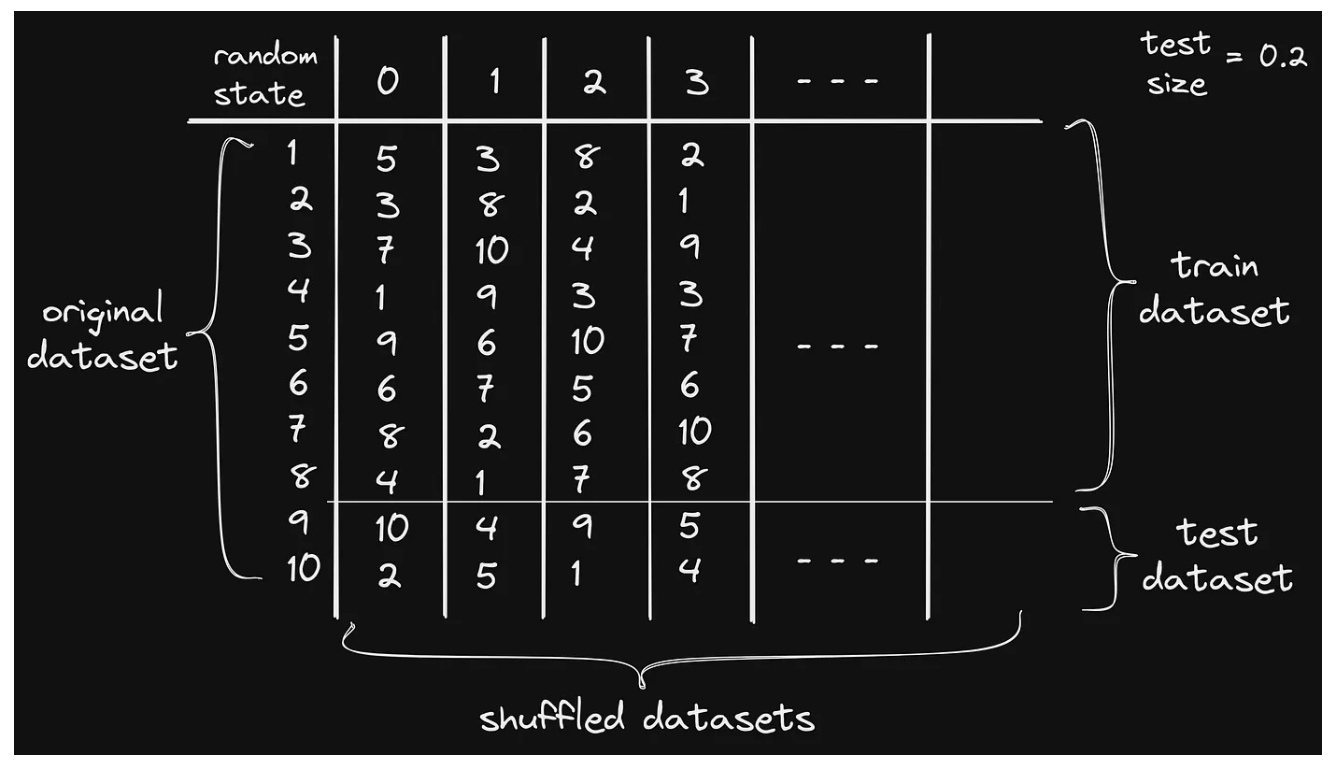

In [ ]:

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
r2_acc = r2_score(y_train, y_pred)
rmse = math.sqrt(mean_squared_error(y_train, y_pred))
r2_acc, rmse


In [ ]:
model = LinearRegression()
model.fit(X_test, y_test)
y_pred = model.predict(X_test)
r2_acc = r2_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2_acc, rmse


In [ ]:
# # original values
# y = np.expm1(y)
# y_pred = np.expm1(y_pred) # Inverse Transformation
# y_pred = [float(x) for x in y_pred]
# y_pred


In [707]:
df_compare = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df_compare['Predicted'] = df_compare['Predicted'].astype('float')
df_compare

ValueError: array length 109 does not match index length 545

In [706]:
df_compare.sort_values(['Predicted'], ascending=False)

,Actual,Predicted,error_diff
1,12250000.0,1.225000e+07,4.470348e-08
6,10150000.0,1.151660e+07,1.366601e+06
57,7245000.0,1.028040e+07,3.035399e+06
26,8463000.0,9.187803e+06,7.248027e+05
5,10850000.0,9.146567e+06,-1.703433e+06
...,...,...,...
521,2408000.0,2.470369e+06,6.236893e+04
528,2275000.0,2.416309e+06,1.413090e+05
484,2870000.0,2.400956e+06,-4.690440e+05
532,2135000.0,2.396360e+06,2.613602e+05


In [705]:
df_compare['error_diff'] = df_compare['Predicted'] - df_compare['Actual']
df_compare.sort_values(['error_diff'], ascending=False)

,Actual,Predicted,error_diff
220,4795000.0,8.003202e+06,3.208202e+06
57,7245000.0,1.028040e+07,3.035399e+06
229,4690000.0,7.193969e+06,2.503969e+06
378,3640000.0,5.938517e+06,2.298517e+06
415,3395000.0,5.554215e+06,2.159215e+06
...,...,...,...
15,9100000.0,4.924287e+06,-4.175713e+06
2,12250000.0,7.868515e+06,-4.381485e+06
0,13300000.0,8.403936e+06,-4.896064e+06
4,11410000.0,6.502035e+06,-4.907965e+06


In [704]:
df_encoded.loc[220, 'area']

0.4432989690721649

In [703]:
df_encoded.loc[220, 'area']

0.4432989690721649

In [ ]:
'''
1, 1, 1, 1, 4000, 0, 0, 0, 0 => 10L
1, 1, 1, 1, 3500, 0, 0, 0, 0 => 2L
1, 1, 1, 1, 3800, 0, 0, 0, 0 => 5L
1, 1, 1, 1, 3700, 0, 0, 0, 0 => 4.5L
1, 1, 1, 1, 3400, 0, 0, 0, 0 => 3L
'''